

# Project: Investigate a Dataset ((TMDb movie Database))


## Introduction
**This data set consists of information about 10 thousand movies collected and generatated using an API, the TMDb API, from The Movie Database (TMDb), including user ratings and revenue. It has 21 columns such as imdb_id, revenue, budget, cast, original title of the movie, vote_count etc.**


## Questions that was answered in this data set:
> 1. Research Question 1 (Which are the distributions of budget and revenue? )
> 2. Research Question 2 (Which are the distributions of net profit and budget? )
> 3. Research Question 3 (Which are the movies of maximum and minimum net profit ? )
> 4. Research Question 4 (Which are the movies of maximum and minimum loss ? )
> 5. Research Question 5 (Which are the movies of maximum and minimum budget ? )
> 6. Research Question 6 (Which are the movies of maximum and minimum revenue ? )
> 7. Research Question 7 (What are the average budget, revenue, and net ptofit of a movie ? )
> 8. Research Question 8 (Is there a relation between revenue and budget ? )
> 9. Research Question 9 (Is there a relation between revenue and net profit ? )
> 10. Research Question 10 (What are the top 10 movies according to net profit ? )
> 11. Research Question 11 (What are the successful genres, cast, and production company? )
> 12. Research Question 12 (What are the genres, cast, and production company with the most loss? )
> 11. Research Question 13 (What are the top 10 movies that made loss according to net profit ? )
> 12. Research Question 14 (What are the most popular geners? )
> 13. Research Question 15 (What are the most popular cast? )
> 14. Research Question 16 (How run time is distributed ? )
> 15. Research Question 17 (What is the correlation between different columns in the data ? )

#### First we will import the packages that is necessary for our data analysis

In [1]:
# import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading the data and exploring the first few rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### The above code to take a first look at the data and be familiar with its content.
#### I found that there is no currency is mentioned for the columns that contain financial data. Moreover, there is no clear relation between popularity, vote count and vote_average so I will not use them in the analysis


### Data Cleaning process.

> 1- Chech the shape of the data

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.shape

(10866, 21)

#### The cell above to know the shape of our data which states that it has 10866 rows and 21 columns. Now it is good to check for missing data in each row and column which I will do in the next cell.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#to get the exact type in each column we can do so

for i in list(df.columns):
    max_len = len(max(list(df.columns) , key=len)) #returns the length of the item of maximum length in the list
    print(i, " "*((max_len - len(i) + 1) + 10), type(df[i][0]))
    


id                               <class 'numpy.int64'>
imdb_id                          <class 'str'>
popularity                       <class 'numpy.float64'>
budget                           <class 'numpy.int64'>
revenue                          <class 'numpy.int64'>
original_title                   <class 'str'>
cast                             <class 'str'>
homepage                         <class 'str'>
director                         <class 'str'>
tagline                          <class 'str'>
keywords                         <class 'str'>
overview                         <class 'str'>
runtime                          <class 'numpy.int64'>
genres                           <class 'str'>
production_companies             <class 'str'>
release_date                     <class 'str'>
vote_count                       <class 'numpy.int64'>
vote_average                     <class 'numpy.float64'>
release_year                     <class 'numpy.int64'>
budget_adj                       <class

In [6]:
'3'+'3'

'33'

> 2- Drop unwanted columns that we see it is not useful for the anlysis.

In [7]:
df.drop(labels = ['imdb_id','homepage', 'overview', 'tagline', 'keywords','budget_adj', 'revenue_adj', 'vote_count', 'vote_average'],axis =1, inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


#### Here we droped unwanted columns for our analysis

> 3- Check for any row duplicates

In [8]:
#check duplicate values
sum(df.duplicated())

1

> 4- Drop those duplicates

In [9]:
#drop duplicate values
df.drop_duplicates(keep= 'first',inplace = True)

> 5- Check for nan values and missing real values in each column

In [10]:
#check for nan values

df.isnull().sum()


id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
dtype: int64

> 6- Drop any rows with NaN values and check again for the shape of data after removing NaNs

In [11]:
# drop any rows with NaN values
df.dropna(axis=0, inplace=True)
df.shape

(9772, 12)

In [12]:
df.isnull().sum().sum()

0

> 7- I take alook at statistical summary of each column. I found that colums like budget, revenue, and run time have zero values which is not reasonable. 

In [13]:
df.describe()

,id,popularity,budget,revenue,runtime,release_year
count,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000
mean,63189.640810,0.694721,1.617967e+07,4.423121e+07,102.926627,2000.878428
std,90718.059987,1.036931,3.221074e+07,1.225889e+08,27.877432,13.036794
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,10221.500000,0.232710,0.000000e+00,0.000000e+00,90.000000,1994.000000
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,2005.000000
75%,70577.250000,0.776408,1.928750e+07,3.104729e+07,112.000000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,2015.000000


> 8- I will filter the data and create a mask to remove those rows with zero values.

In [14]:
#drop rows of movies that have budget, revenue, or runtime equals zero 
df.drop(df[(df['budget'] == 0) | (df['revenue'] == 0) | (df['runtime'] == 0)].index, inplace=True)
df.describe()

,id,popularity,budget,revenue,runtime,release_year
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,109.351117,2001.229172
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,19.845678,11.329616
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,1995.000000
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,2004.000000
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [15]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


> 9- Final check of our cleaned data to ensure its new shape and there are no NaN values.

In [16]:
df.shape

(3805, 12)

In [17]:
df.isnull().any()

id                      False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
runtime                 False
genres                  False
production_companies    False
release_date            False
release_year            False
dtype: bool

> 10- It is good to add a column of the net profit of each movie in the cleaned data so we can identify which one was a hit that made profits and which one made loss. I added a new column called 'net_profit' which contains the subtraction of 'revenue' and 'budget' for each movie.

In [18]:
# adding a column of the gross_profit for each movie

df.insert(4, 'net_profit', df['revenue'] - df['budget'] )

In [19]:
df.head()

,id,popularity,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


In [20]:
df.describe()

,id,popularity,budget,revenue,net_profit,runtime,release_year
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3.805000e+03,3805.000000,3805.000000
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,7.136540e+07,109.351117,2001.229172
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,1.513764e+08,19.845678,11.329616
min,5.000000,0.010335,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,1960.000000
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,-1.173477e+06,96.000000,1995.000000
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,2.047434e+07,106.000000,2004.000000
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,8.347333e+07,119.000000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis



## Budget and revenue questions.

### Research Question 1 (Which are the distributions of budget and revenue? )

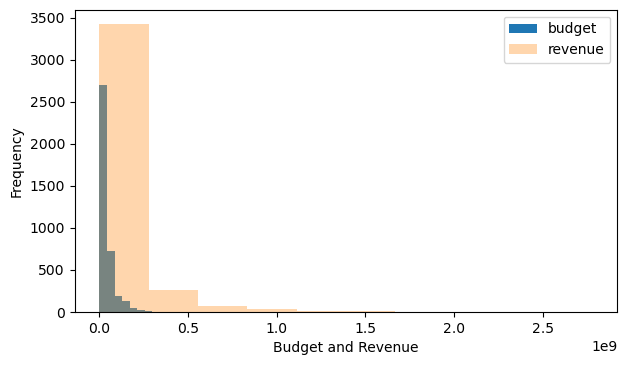

In [21]:
# plot a histogram of budget and revenue
plt.figure(figsize=(7,4), dpi = 100)
plt.hist(df['budget'], alpha = 1, label=['budget'])
plt.hist(df['revenue'], color=[(1.00,0.60,0.20)], alpha = 0.4, label='revenue')
plt.xlabel('Budget and Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()
#right skewed

**Both the budget and revenue are right skewed.**

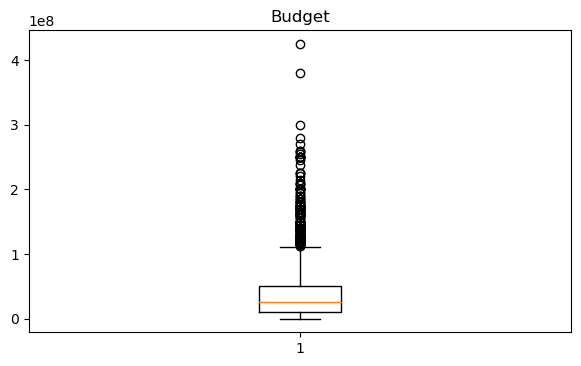

In [22]:
# plot a box plot of budget 
plt.figure(figsize=(7,4), dpi = 100)
plt.boxplot(df['budget'])
plt.title('Budget')
plt.show()

**There are outliers as seen from the box plot and the median of the budget is below 50 million.** 

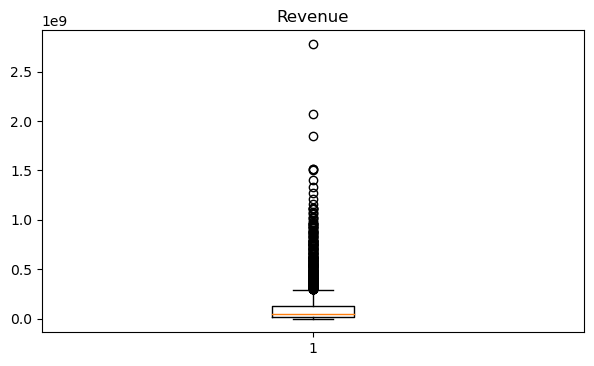

In [23]:
# plot a box plot of revenue 
plt.figure(figsize=(7,4), dpi = 100)
plt.boxplot(df['revenue'])
plt.title('Revenue')
plt.show()

**There are outliers as seen from the box plot and the median of the revenue is around 100 million.** 

### Research Question 2 (Which are the distributions of net profit and budget? )

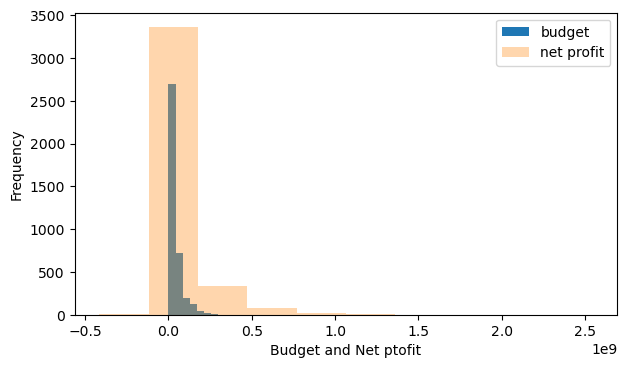

In [24]:
plt.figure(figsize=(7,4), dpi = 100)
plt.hist(df['budget'],  alpha = 1, label=['budget' ])
plt.hist(df['net_profit'], color=[(1.00,0.60,0.20)], alpha = 0.4, label='net profit')
plt.xlabel('Budget and Net ptofit')
plt.ylabel('Frequency')
plt.legend()
plt.show()
#the losses are not graet

**Both the budget and the net profit are right skewed.**

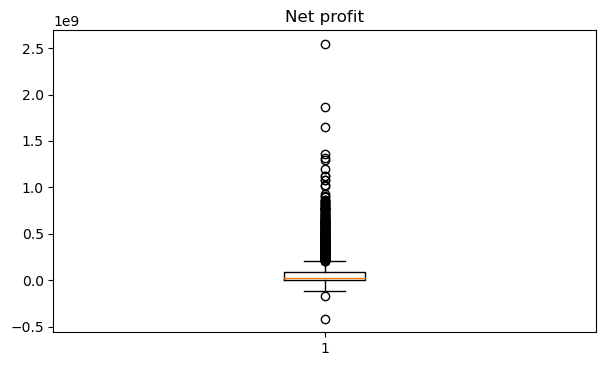

In [25]:
plt.figure(figsize=(7,4), dpi = 100)
plt.boxplot(df['net_profit'])
plt.title('Net profit')
plt.show()

**There are outliers for movies that made both profits and loss**

### Research Question 3 (Which are the movies of maximum and minimum net profit ? )

In [26]:
# define a function that returns a row that has maximum and minimum values according to a column entry
def row_data_max(Data, column):
    return pd.DataFrame(Data.loc[Data[column].idxmax()]).T 

def row_data_min(Data, column):
    return pd.DataFrame(Data.loc[Data[column].idxmin()]).T 

In [27]:
#movie with the maximum net profit
row_data_max(df, 'net_profit')  

,id,popularity,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
1386,19995,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,2009


In [28]:
#movie with the minimum net profit
m_nf = df[df['net_profit'] > 0]
row_data_min(m_nf, 'net_profit')  

,id,popularity,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
5852,217708,0.222776,10,11,1,Hross Ã­ oss,Ingvar Eggert SigurÃ°sson|Charlotte BÃ¸ving|St...,Benedikt Erlingsson,85,Drama|Romance|Comedy,Filmhuset Gruppen|Leiknar Myndir,8/30/13,2013


In [29]:
# average net profit for movies with no loss
m_nf['net_profit'].mean()

103986757.0892598

### Research Question 4 (Which are the movies of maximum and minimum loss ? )

In [30]:
#movie with the maximum loss
hl_nf = df[df['net_profit'] < 0]

# it is tricky here as we deal with negative profit values
row_data_min(hl_nf, 'net_profit') 

,id,popularity,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
2244,46528,0.25054,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,2010


In [31]:
# movie with the minimum loss
ml_nf = df[df['net_profit'] < 0]
# it is tricky here as we deal with negative profit values
row_data_max(ml_nf, 'net_profit') 

,id,popularity,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
5162,24914,0.208637,10,5,-5,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15,Science Fiction|Animation,Studio 4Â°C,6/2/03,2003


### Research Question 5 (Which are the movies of maximum and minimum budget ? )

In [32]:
# movie with the maximum budget
row_data_max(df, 'budget') 

,id,popularity,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
2244,46528,0.25054,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,2010


In [33]:
# movie with the minimum budget
row_data_min(df, 'budget') 

,id,popularity,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
2618,39964,0.090186,1,100,99,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,4/23/99,1999


In [34]:
# Average budget for a movie that has no loss
m_nf['budget'].mean()

40556957.67198839

### Research Question 6 (Which are the movies of maximum and minimum revenue ? )

In [35]:
# movie with the maximum revenue

row_data_max(df, 'revenue') 

,id,popularity,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
1386,19995,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,2009


In [36]:
# movie with the minimum revenue
row_data_min(df, 'revenue') 

,id,popularity,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
5067,13537,0.462609,6000000,2,-5999998,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,11/14/03,2003


In [37]:
# Average revenue for a movie that has no loss
m_nf['revenue'].mean()

144543714.76124817

### Research Question 7 (What are the average budget, revenue, and net ptofit of a movie ? )

In [38]:
# average budget for the movie in the whole data frame
df['budget'].mean()

37607996.559526935

In [39]:
# average revenue for the movie in the whole data frame
df['revenue'].mean()

108973391.99159001

In [40]:
# average net profit for the movie in the whole data frame
df['net_profit'].mean()

71365395.43206307

### Research Question 8 (Is there a relation between revenue and budget ? )

In [41]:
# find the correlation between budget and revenue
df['budget'].corr(df['revenue'])

0.6870586165480226

Text(0.5, 1.0, 'Budget - Revenue correlation ')

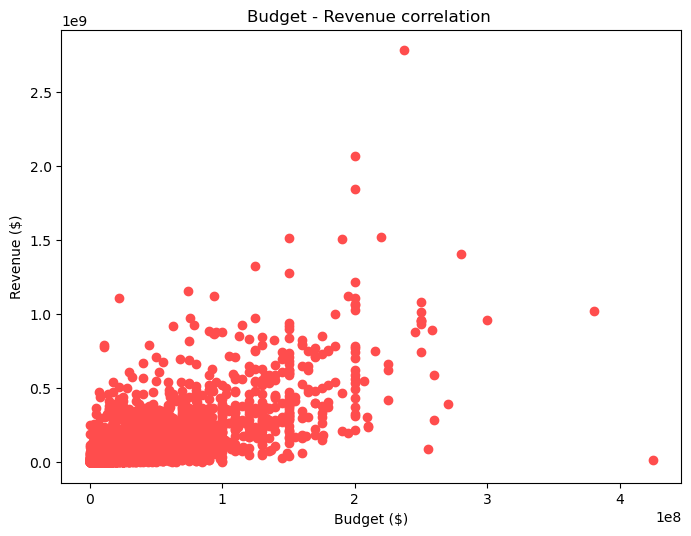

In [42]:
## find the correlation between budget and revenue as a scatter plot
plt.figure(figsize=(8,6), dpi = 100)
plt.scatter(df['budget'], df['revenue'], color=[(1.00,0.30,0.30)])
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.title('Budget - Revenue correlation ')

**One can find there is sort of positive correlation between budget and revenue**

### Research Question 9 (Is there a relation between revenue and net profit ? )

In [43]:
# find the correlation between net profit and revenue
df['net_profit'].corr(df['revenue'])

0.9791490191278416

Text(0.5, 1.0, 'Revenue - Net profit correlation ')

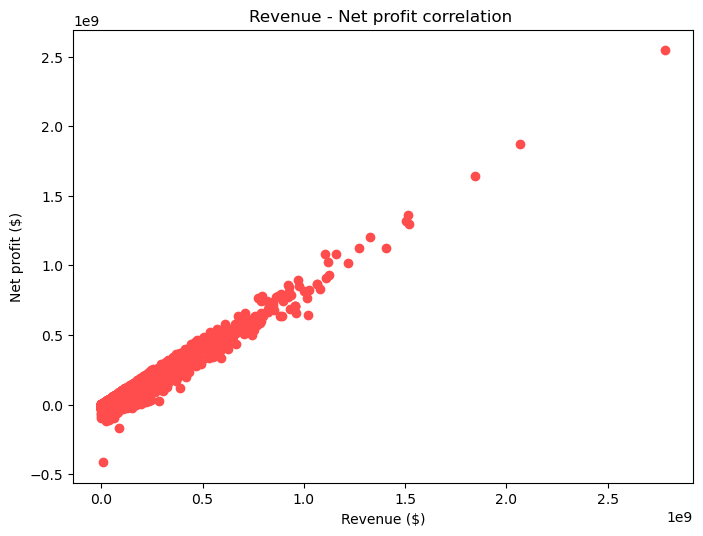

In [44]:
## find the correlation between net profit and revenue as a scatter plot
plt.figure(figsize=(8,6), dpi = 100)
plt.scatter(df['revenue'], df['net_profit'], color=[(1.00,0.30,0.30)])
plt.xlabel('Revenue ($)')
plt.ylabel('Net profit ($)')
plt.title('Revenue - Net profit correlation ')

**One can find there is a strong positive correlation between revenue and net profit**

### Research Question 10 (What are the top 10 movies according to net profit ? )

In [45]:
# getting the top 10 movies that made net profit
lb = df.sort_values('net_profit', ascending=False)[['original_title', 'net_profit', 'budget','genres']]
lb.head(10)

,original_title,net_profit,budget,genres
1386,Avatar,2544505847,237000000,Action|Adventure|Fantasy|Science Fiction
3,Star Wars: The Force Awakens,1868178225,200000000,Action|Adventure|Science Fiction|Fantasy
5231,Titanic,1645034188,200000000,Drama|Romance|Thriller
0,Jurassic World,1363528810,150000000,Action|Adventure|Science Fiction|Thriller
4,Furious 7,1316249360,190000000,Action|Crime|Thriller
4361,The Avengers,1299557910,220000000,Science Fiction|Action|Adventure
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822,125000000,Adventure|Family|Fantasy
14,Avengers: Age of Ultron,1125035767,280000000,Action|Adventure|Science Fiction
5422,Frozen,1124219009,150000000,Animation|Adventure|Family
8094,The Net,1084279658,22000000,Crime|Drama|Mystery|Thriller|Action


In [46]:
#find the mean budget of these top 10 movies
lb['budget'].head(10).mean()

177400000.0

In [47]:
#find the mean net profit of these top 10 movies
lb['net_profit'].head(10).mean()

1457340659.6

### Research Question 11 (What are the successful genres, cast, and production company? )

In [48]:
# define a dataframe that made no net profit loss
lb1 = df[df['net_profit'] > 1]

In [49]:
# find the count of each genres in this dataframe
pd.Series(lb1.genres.str.cat(sep = '|').split('|')).value_counts()

Drama              1159
Comedy              998
Thriller            836
Action              785
Adventure           573
Romance             466
Crime               463
Science Fiction     381
Horror              341
Family              337
Fantasy             296
Mystery             221
Animation           161
Music                94
History              93
War                  89
Western              33
Documentary          22
Foreign               1
TV Movie              1
dtype: int64

In [50]:
# find the count of the cast (in order) in this dataframe
pd.Series(lb1.cast.str.cat(sep = '|').split('|')).value_counts()

Robert De Niro       38
Bruce Willis         33
Tom Hanks            33
Tom Cruise           31
Brad Pitt            30
                     ..
Alden Ehrenreich      1
Alice Englert         1
Frederick Parslow     1
Chadwick Boseman      1
Raquel Welch          1
Length: 5450, dtype: int64

In [51]:
pd.Series(lb1.production_companies.str.cat(sep = '|').split('|')).value_counts()

Universal Pictures                        269
Warner Bros.                              250
Paramount Pictures                        221
Twentieth Century Fox Film Corporation    173
Columbia Pictures                         150
                                         ... 
First Wedding Productions                   1
Chydzik Media Group                         1
Voodoo Production Services                  1
120dB Films                                 1
Chenault Productions                        1
Length: 2417, dtype: int64

### Research Question 12 (What are the genres, cast, and production company with the most loss? )

In [52]:
lb2 = df[df['net_profit'] < 0]
pd.Series(lb2.genres.str.cat(sep = '|').split('|')).value_counts()

Drama              568
Thriller           358
Comedy             334
Action             290
Romance            191
Crime              186
Adventure          170
Science Fiction    136
Mystery            122
Horror             118
Fantasy             99
Family              80
Animation           38
Music               37
History             35
War                 30
Western             19
Foreign              8
Documentary          4
dtype: int64

In [53]:
lb2 = df[df['net_profit'] < 0]
pd.Series(lb2.cast.str.cat(sep = '|').split('|')).value_counts()

Nicolas Cage         17
Robert De Niro       14
Samuel L. Jackson    14
Julianne Moore       13
Bruce Willis         13
                     ..
Roscoe Lee Browne     1
Ashton Holmes         1
Lauren German         1
Rae Dawn Chong        1
Theresa Merritt       1
Length: 2975, dtype: int64

In [54]:
lb2 = df[df['net_profit'] < 0]
pd.Series(lb2.production_companies.str.cat(sep = '|').split('|')).value_counts()

Warner Bros.                 74
Universal Pictures           60
Paramount Pictures           49
Touchstone Pictures          36
Metro-Goldwyn-Mayer (MGM)    30
                             ..
Blitz Films                   1
VIP Media Group               1
Michael Mailer Films          1
Ledge Productions             1
Motown Productions            1
Length: 1503, dtype: int64

### Research Question 13 (What are the top 10 movies that made loss according to net profit ? )

In [55]:
#getting the lowest movies concerning net profit
lb_l = df.sort_values('net_profit', ascending=False)[['original_title', 'net_profit', 'budget']]
lb_l.tail(10)

,original_title,net_profit,budget
2915,Australia,-80445998,130000000
6590,Flushed Away,-84540684,149000000
6707,Charlotte's Web,-84999856,85000000
4078,The Adventures of Pluto Nash,-92896027,100000000
2435,The 13th Warrior,-98301101,160000000
4970,Brother Bear,-99999750,100000000
3484,Mars Needs Moms,-111007242,150000000
7031,The Alamo,-119180039,145000000
5508,The Lone Ranger,-165710090,255000000
2244,The Warrior's Way,-413912431,425000000


In [56]:
# getting the average of the budget of the last 10 movies (that made loss)
lb_l['budget'].tail(10).mean()

169900000.0

In [57]:
# getting the average of the loss of the last 10 movies (that made loss)
lb_l['net_profit'].tail(10).mean()

-135099321.8

## Cast and genres questions

### Research Question 14 (What are the most popular geners? )

Text(0.5, 1.0, 'Top Genres Order ')

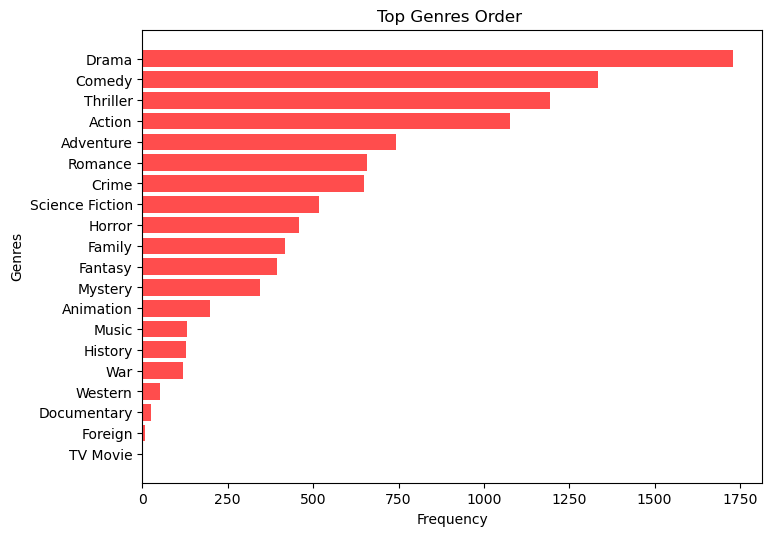

In [58]:
# getting count of unique genres
pg = pd.Series(df.genres.str.cat(sep = '|').split('|')).value_counts()
pg.sort_values(ascending = True, inplace = True)
#making list of it to plot
lis = list(zip(*list(pg.items())))
#plotting
plt.figure(figsize=(8,6), dpi = 100)
plt.barh(lis[0], lis[1], color=[(1.00,0.30,0.30)])
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.title('Top Genres Order ')

### Research Question 15 (What are the most popular cast? )

Text(0.5, 1.0, 'Top 20 Cast Order ')

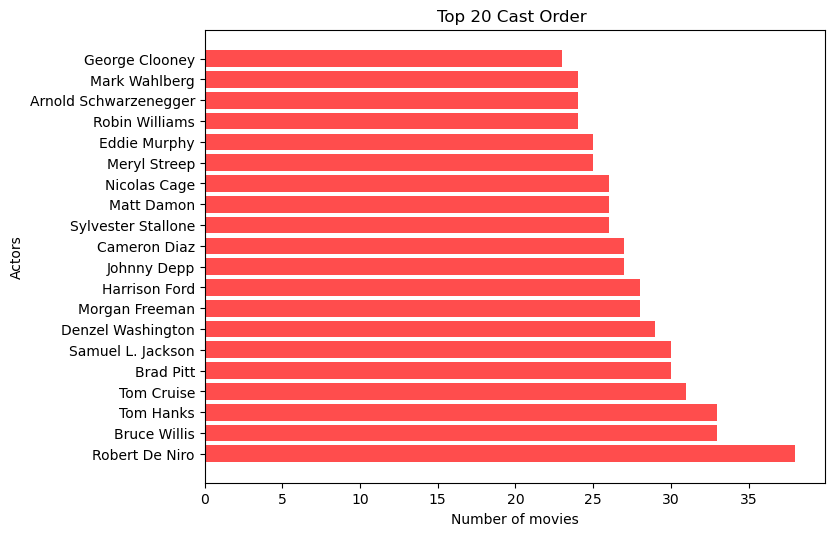

In [59]:
# plot the top first 20
pc = pd.Series(df[df['net_profit']>0].cast.str.cat(sep = '|').split('|')).value_counts()
lpc = list(zip(*list(pc.items())))
plt.figure(figsize=(8,6), dpi = 100)
plt.barh(lpc[0][0:20], lpc[1][0:20], color=[(1.00,0.30,0.30)])
plt.xlabel('Number of movies')
plt.ylabel('Actors')
plt.title('Top 20 Cast Order ')

### Research Question 16 (How run time is distributed ? )

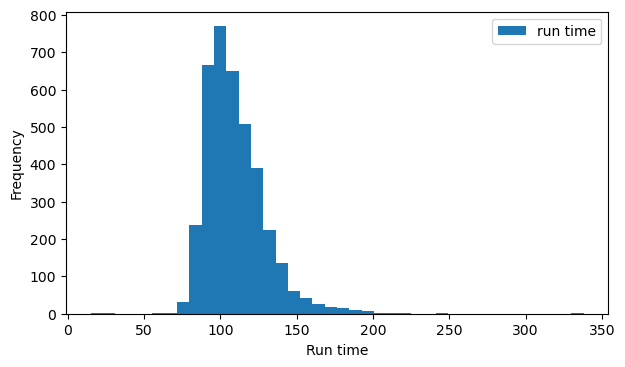

In [60]:
plt.figure(figsize=(7,4), dpi = 100)
plt.hist(df['runtime'], bins= 40, alpha = 1, label=['run time' ])
plt.xlabel('Run time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**The run time is also right skewed with mode and median around 110 minutes.**

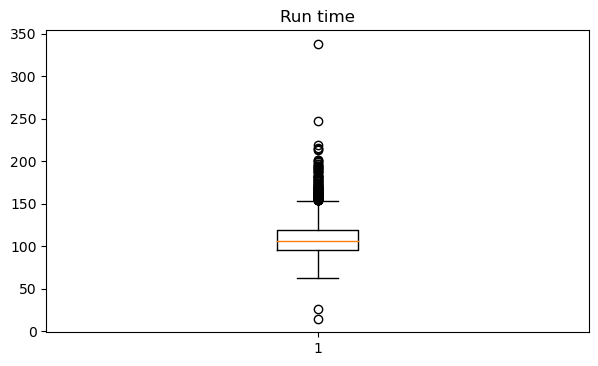

In [61]:
plt.figure(figsize=(7,4), dpi = 100)
plt.boxplot(df['runtime'])
plt.title('Run time')
plt.show()

**This box plot shows that run time is also right skewed and has outliers with mode and median around 110 minutes.**

In [62]:
# Average duration of all movies in the data set
print('Average run time of the movies is:  ', df['runtime'].mean())

Average run time of the movies is:   109.35111695137977


In [63]:
# average runtime of the movies concerning net profit without loss
m_nf['runtime'].mean()

110.22460087082729

In [64]:
# average runtime of the best 20 movies concerning net profit
rtb = df.sort_values('net_profit', ascending=False)
rtb['runtime'].iloc[0:20].mean()

136.65

In [65]:
# average runtime of the worest 20 movies concerning net profit
rtm = df.sort_values('net_profit', ascending=False)
rtm['runtime'].tail(20).mean()

107.9

### Research Question 17 (What is the correlation between different columns in the data ? )

In [66]:
df.corr()

,id,popularity,budget,revenue,net_profit,runtime,release_year
id,1.000000,0.188179,-0.029224,-0.004503,0.002896,-0.036166,0.491245
popularity,0.188179,1.000000,0.443626,0.613793,0.594868,0.213690,0.175991
budget,-0.029224,0.443626,1.000000,0.687059,0.525128,0.259562,0.271915
revenue,-0.004503,0.613793,0.687059,1.000000,0.979149,0.249178,0.141317
net_profit,0.002896,0.594868,0.525128,0.979149,1.000000,0.219278,0.089493
runtime,-0.036166,0.213690,0.259562,0.249178,0.219278,1.000000,-0.113488
release_year,0.491245,0.175991,0.271915,0.141317,0.089493,-0.113488,1.000000


**It is good to look at a summary of the correlation between each column paramater and other columns to find build a fast glance about the relation between them.**

In [67]:
pg = pd.Series(df.genres.str.cat(sep = '|').split('|')).value_counts()
pg.head()

Drama        1729
Comedy       1335
Thriller     1194
Action       1076
Adventure     743
dtype: int64

<AxesSubplot:>

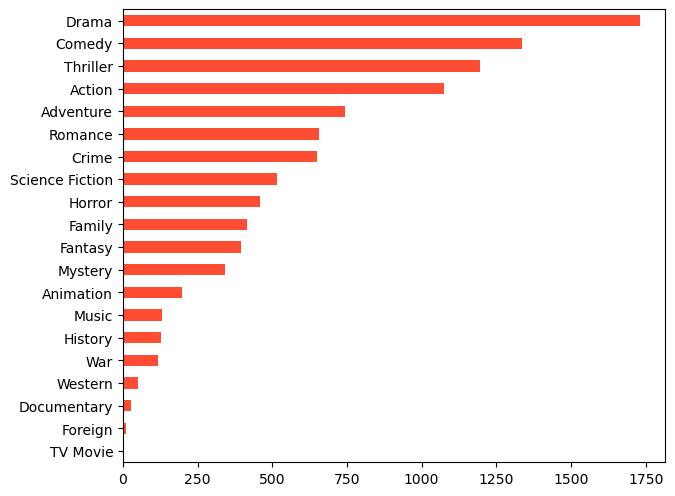

In [68]:
pg.sort_values(ascending = True, inplace = True)
plt.figure(figsize=(7,6), dpi = 100)
pg.plot.barh(color=[(1.00,0.30,0.20)])

<a id='conclusions'></a>
## Conclusions



**For a Movie to be make net profit**
> 1. The average Budget must be around 40.5 millon dollar and 177 for the top 10 movies.
> 2. Average duration of the movie must be 110 minutes and 137 minutes for the top 20 movies.
> 3. This cast seems to make success for the movie :Robert De Niro, Bruce Willis, Tom Hanks, Tom Cruise,Brad Pitt
> 4. The genre that made success : Drama, Comedy, Thriller, Action, Adventure.
> 5. The production company to be: Universal Pictures, Warner Bros, Paramount Pictures, Twentieth Century Fox Film Corporation, Columbia Pictures.

**be careful**
In our analysis we droped some of the rows that contained missing data. If those data were taken into consideration, they might change the analysis. Also it is not sure that the data provided to us is completely correct and up to date.

